# 1. Install Dependencies and Setup

In [4]:
!pip install tensorflow tensorflow opencv-python matplotlib

  Using cached tensorflow-2.20.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 24.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 29.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 99.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 16.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 60.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 46.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 53.5 MB/s eta 0:00:00:00:01
  Attempting uninstall: numpy1m╸━━━━━━━━━━━━━━━━━━━━━━━━━ 10/27 [opt_ei

In [5]:
!pip list

Package                   Version
------------------------- --------------
absl-py                   2.3.1
anyio                     4.9.0
argon2-cffi               25.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
astunparse                1.6.3
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.4
bleach                    6.2.0
certifi                   2025.7.9
cffi                      1.17.1
charset-normalizer        3.4.2
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.3.2
cycler                    0.12.1
debugpy                   1.8.14
decorator                 5.2.1
defusedxml                0.7.1
executing                 2.2.0
fastjsonschema            2.21.1
filelock                  3.13.1
flatbuffers               25.2.10
fonttools                 4.58.5
fqdn                      1.5.1
fsspec       

In [6]:
import tensorflow as tf
import os

2025-08-25 17:13:05.341928: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-25 17:13:05.365701: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-25 17:13:06.423995: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-25 17:13:13.013759: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

In [7]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2025-08-25 17:13:35.349701: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [12]:
!apt-get update && apt-get install -y libgl1-mesa-glx

Reading package lists... Done
E: List directory /var/lib/apt/lists/partial is missing. - Acquire (13: Permission denied)


In [13]:
data_dir = 'data' 

In [14]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [15]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data/sad/280-2804580_sad-people-png-sad-person-png-transparent-png.png
Issue with image data/sad/iStock_000001932580XSmall.jpg
Issue with image data/sad/b11b520b0818895ae5563d1e70294052.jpg
Issue with image data/sad/image25.jpeg
Issue with image data/sad/screen-shot-2014-07-31-at-6-09-12-pm.png
Issue with image data/sad/maxresdefault3.jpg
Issue with image data/sad/image11.jpeg
Issue with image data/sad/image14.jpeg
Issue with image data/sad/766x415_Depression_vs_Sadness.jpg
Issue with image data/sad/sad-human-figure-depression-concept-drawing-frank-ramspott.jpg
Issue with image data/sad/image32.png
Issue with image data/sad/images40.jpg
Issue with image data/sad/images14.jpg
Issue with image data/sad/images47.jpg
Issue with image data/sad/images10.jpg
Issue with image data/sad/images24.jpg
Issue with image data/sad/images23.jpg
Issue with image data/sad/0x0.jpg
Issue with image data/sad/image17.jpeg
Issue with image data/sad/sad-more-money.jpg
Issue with image data/sad

# 3. Load Data

In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [18]:
data_iterator = data.as_numpy_iterator()

In [19]:
batch = data_iterator.next()

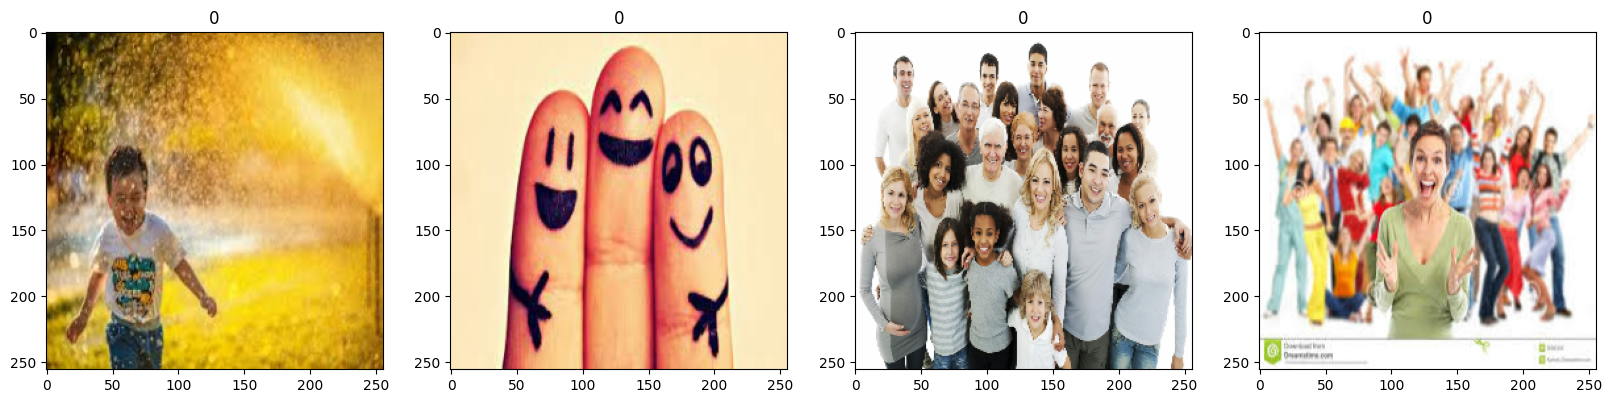

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [21]:
data = data.map(lambda x,y: (x/255, y))

In [22]:
data.as_numpy_iterator().next()

(array([[[[0.02331495, 0.01939338, 0.00370711],
          [0.04571078, 0.03002451, 0.0182598 ],
          [0.05892549, 0.04716079, 0.02755295],
          ...,
          [0.04313726, 0.06666667, 0.06666667],
          [0.04283711, 0.05852338, 0.07028808],
          [0.03529412, 0.05251225, 0.06427696]],
 
         [[0.05690583, 0.04121955, 0.02945485],
          [0.05223652, 0.03655025, 0.02478554],
          [0.05900735, 0.04724265, 0.0276348 ],
          ...,
          [0.04313726, 0.06666667, 0.06666667],
          [0.04683239, 0.06251867, 0.07428338],
          [0.03534917, 0.05256731, 0.06433202]],
 
         [[0.0836397 , 0.06403186, 0.05226716],
          [0.04712058, 0.0314343 , 0.0196696 ],
          [0.04808948, 0.04416791, 0.02456007],
          ...,
          [0.04024634, 0.06377576, 0.06377576],
          [0.04705882, 0.0627451 , 0.07450981],
          [0.03953211, 0.05675025, 0.06851496]],
 
         ...,
 
         [[0.04947917, 0.0573223 , 0.03771446],
          [0.04963

# 5. Split Data

In [23]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [24]:
train_size

7

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [26]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [32]:
logdir='logs'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 934ms/step - accuracy: 0.5089 - loss: 0.7987 - val_accuracy: 0.6562 - val_loss: 0.6441
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6116 - loss: 0.6496 - val_accuracy: 0.7188 - val_loss: 0.6016
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6607 - loss: 0.5816 - val_accuracy: 0.8594 - val_loss: 0.5270
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 770ms/step - accuracy: 0.8238 - loss: 0.5468

2025-08-25 17:18:45.789256: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.8482 - loss: 0.4938 - val_accuracy: 0.6875 - val_loss: 0.5058
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7902 - loss: 0.4697 - val_accuracy: 0.8438 - val_loss: 0.3265
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8571 - loss: 0.3771 - val_accuracy: 0.7344 - val_loss: 0.4334
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8884 - loss: 0.3151 - val_accuracy: 0.9844 - val_loss: 0.2156
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 743ms/step - accuracy: 0.9061 - loss: 0.2734

2025-08-25 17:19:19.655110: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8839 - loss: 0.2900 - val_accuracy: 0.9375 - val_loss: 0.1958
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9643 - loss: 0.1777 - val_accuracy: 0.9375 - val_loss: 0.1657
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9643 - loss: 0.1525 - val_accuracy: 0.9844 - val_loss: 0.0963
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9777 - loss: 0.1052 - val_accuracy: 0.9531 - val_loss: 0.1123
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 559ms/step - accuracy: 0.9736 - loss: 0.0805

2025-08-25 17:19:57.228119: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 989ms/step - accuracy: 0.9732 - loss: 0.0709 - val_accuracy: 0.9844 - val_loss: 0.0733
Epoch 13/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.9930 - loss: 0.0523

2025-08-25 17:20:07.306700: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 880ms/step - accuracy: 0.9866 - loss: 0.0669 - val_accuracy: 0.9844 - val_loss: 0.0418
Epoch 14/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 953ms/step - accuracy: 0.9955 - loss: 0.0455 - val_accuracy: 1.0000 - val_loss: 0.0353
Epoch 15/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 951ms/step - accuracy: 0.9866 - loss: 0.0478 - val_accuracy: 1.0000 - val_loss: 0.0263
Epoch 16/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9911 - loss: 0.0417 - val_accuracy: 0.9844 - val_loss: 0.0355
Epoch 17/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 868ms/step - accuracy: 0.9955 - loss: 0.0309 - val_accuracy: 1.0000 - val_loss: 0.0154
Epoch 18/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 807ms/step - accuracy: 0.9911 - loss: 0.0256 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 19/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 939ms/step - accuracy: 0.9955 - loss: 0.0156 - val_accuracy: 1.0000 - val_loss: 0.0115
Epoch 20/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 845ms/step - accuracy: 0.9955 - loss: 0.0221 - val_accuracy: 0.9844 - val_loss: 0.0

# 8. Plot Performance

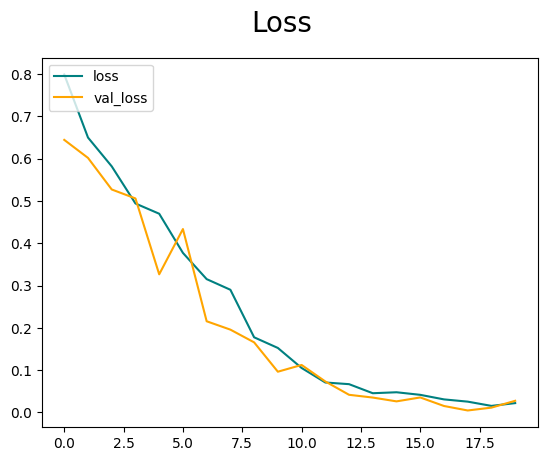

In [35]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

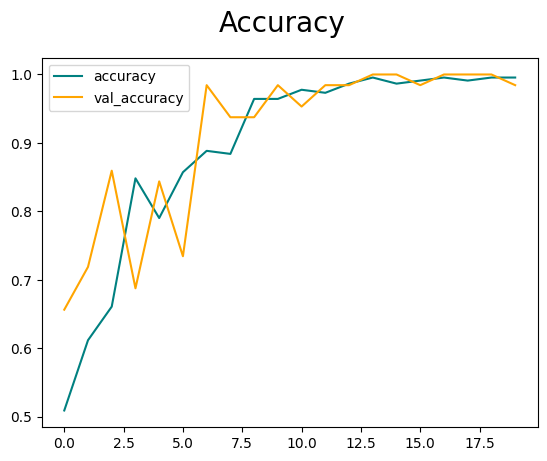

In [36]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [38]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [39]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


2025-08-25 17:21:43.321233: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [40]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [49]:
import cv2

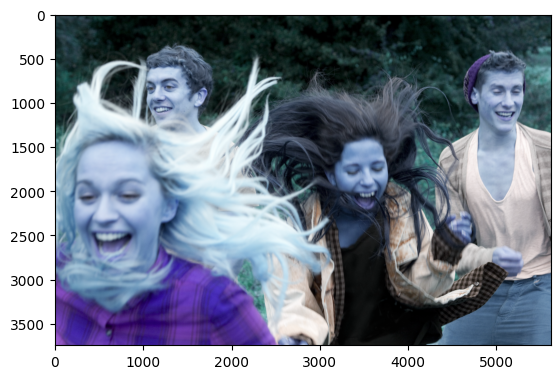

In [50]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

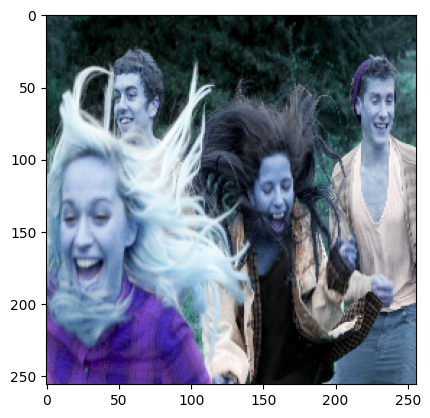

In [51]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [52]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [53]:
yhat

array([[0.97391045]], dtype=float32)

In [54]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [55]:
from tensorflow.keras.models import load_model

In [60]:
model.save(os.path.join('models','imageclassifier.h5'))

In [62]:
new_model = load_model(os.path.join('models', 'imageclassifier.h5'))

In [63]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[0.97391045]], dtype=float32)